#<h1><center>Lab 1 - A1</center></h1>

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

## PROBLEMA RUCSACULUI

-	n obiecte, fiecare obiect are o valoare (v) şi o greutate (w)
-	Obiectiv: puneţi în rucsac valoarea maximă fără a depăşi greutatea maximă admisă W
-	xi=1 înseamnă obiectul i este pus în rucsac
-	xi=0 înseamnă obiectul i nu este pus în rucsac


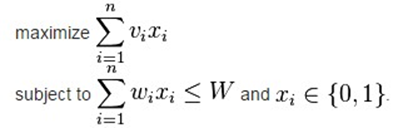

## 5	RANDOM HILL-CLIMBING (RHC)

1.	Se selectează un punct aleator c (current) în spaţiul de căutare
2.	Se alege un punct x din vecinătatea lui c: N(c).
Dacă eval(x) este mai bun decât eval(c) atunci c=x.
3.	Repetă pasul 2 până când un număr maxim de evaluări se atinge.
4.	Returnează c.


## Lucru în timpul laboratorului

1.	Completarea de cod în fișierul Jupyter Notebook (A1.ipynb) unde e notat cu **TODO**:
 1.	Definirea funcției de fitness/evaluare (10p)
 1.	Validarea unei soluții generate (10p)
 1.  Generare soluție prin vecinătate(10p)
 1.	Completarea algoritmului RHC (10p)
 1.	Completarea tabelului de date (10p)

**Total Punctaj A1-Lab = 50p**

**Deadline Lab 1**


### Încărcare date din fișier (10p)

In [ ]:
# definire încărcare date
def load_data(file_name: str) -> "tuple[list[tuple[int, int]], int]":
  """
  Citeste datele din fisierul file_name
  """
  weights_and_values = []
  with open(file_name) as f:
    nr_obj = int(f.readline())
    for i in range(nr_obj):
      line = f.readline()
      line = line.split(" ")
      line = [x for x in line if x != ""]
      weights_and_values.append(tuple(int(x) for x in line[1:]))
    max_capacity = int(f.readline())
  return weights_and_values, max_capacity

# load_data("/content/rucsac-200.txt") # rucsac-20.txt and rucsac-200.txt

([(835, 735),
  (1670, 1470),
  (3340, 2940),
  (1087, 987),
  (1087, 987),
  (517, 417),
  (1034, 834),
  (2068, 1668),
  (1034, 834),
  (630, 530),
  (1260, 1060),
  (1260, 1060),
  (1071, 971),
  (165, 65),
  (330, 130),
  (495, 195),
  (176, 76),
  (663, 563),
  (1326, 1126),
  (1326, 1126),
  (984, 884),
  (1968, 1768),
  (2952, 2652),
  (829, 729),
  (1658, 1458),
  (3316, 2916),
  (829, 729),
  (663, 563),
  (1326, 1126),
  (1989, 1689),
  (1086, 986),
  (1086, 986),
  (639, 539),
  (1278, 1078),
  (2556, 2156),
  (1917, 1617),
  (895, 795),
  (1790, 1590),
  (3580, 3180),
  (888, 788),
  (1776, 1576),
  (3552, 3152),
  (2664, 2364),
  (232, 132),
  (464, 264),
  (928, 528),
  (464, 264),
  (472, 372),
  (944, 744),
  (691, 591),
  (1382, 1182),
  (2764, 2364),
  (1052, 952),
  (1052, 952),
  (1057, 957),
  (2114, 1914),
  (2114, 1914),
  (456, 356),
  (912, 712),
  (651, 551),
  (1302, 1102),
  (1953, 1653),
  (711, 611),
  (1422, 1222),
  (1042, 942),
  (232, 132),
  (464, 264

### Definire funcții de fitness/evaluare (10p) și generare (10p)

In [29]:
# definire funcții de fitness/evaluare și generare

def is_valid(objects: list, sol: list, max_capacity: int):
  """
  Verifica validitatea unei solutii
  """
  sum = 0
  for i in range(0, len(objects)):
    sum += objects[i][1] * sol[i]
  return sum <= max_capacity

def generate_solution(n: int):
  """
  Genereaza o solutie aleatoare
  """
  return list(np.random.randint(2, size=n))


def generate_valid_solution(n: int, objects: list, max_capacity: int):
  """
  Genereaza o solutie valida aleatoare
  INPUT
  ------
  n: numarul de obiecte
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  sol: soluția generată
  """
  stop = False
  sol = []
  while not stop:
    sol = generate_solution(n)
    stop = is_valid(objects, sol, max_capacity)
  return sol

def fitness(objects: list, sol: list, max_capacity: int):
  """
  Evaluează o soluție pentru problema rucsacului.
  INPUT
  ------
  objects: obiectele care pot fi adăugate în rucsac
  sol: solutția drept o listă de 0 și 1 de lungimea numărului de obiecte
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  value: valoarea tutoror obiectelor care au fost adăugate în rucsac
        sau -1 dacă greutatea obiectelor trece peste greutatea maximă permisă
  """
  value = 0
  weight = 0
  for i in range(0, len(objects)):
    value += objects[i][0] * sol[i]
    weight += objects[i][1] * sol[i]

  return value if weight <= max_capacity else -1

fitness

<function __main__.fitness(objects: list, sol: list, max_capacity: int)>

### Completare algoritm RHC (10p)

In [30]:
def random_neighbor(sol: list):
  """
  Generează un vecin aleatoriu pentru o soluție
  """
  x = sol[:]
  index = random.randint(0, len(sol) - 1)
  x[index] = 1 - x[index]
  return x

def random_hill_climbing(k: int, objects: list, max_capacity: int):
  """
  Algoritm RHC pentru problema rucsacului.
  INPUT
  ------
  k: numărul de iterații
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  -----
  c - cea mai bună soluție
  fc - fitness-ul acesteia
  found_solutions - lista cu fitness-urile de la o iterație la alta
  """
  c = generate_valid_solution(len(objects), objects, max_capacity)
  fc = fitness(objects, c, max_capacity)
  found_solutions = [fc]
  while k > 0:
    x = random_neighbor(c)
    fx = fitness(objects, x, max_capacity)
    if fx > fc:
      c = x[:]
      fc = fx
    found_solutions.append(fc) # adaugă fitness-ul celei mai bune soluții
    k -= 1
  return c, fc, found_solutions

In [31]:
def rhc_n_times(n: int, k: int, objects: list, max_capacity: int):
  """
  Ruleaza algoritmul de n ori si returneaza cele mai bune solutii
  """
  best_solutions = []
  average_time = 0
  for _ in range(n):
    start = time.time()
    best_solution, best_fitness, _ = random_hill_climbing(k, objects, max_capacity)
    stop = time.time() - start
    average_time = stop
    best_solutions.append((best_solution, best_fitness))
  average_time /= n
  return best_solutions, average_time

problem_instances = ['rucsac-20.txt', 'rucsac-200.txt'] # TODO: Schimbă valorile astfel încât să fie cele din tabel
values_for_n = [10] # TODO: Schimbă valorile astfel încât să fie cele din tabel
values_for_k = [50, 100, 200] # TODO: Schimbă valorile astfel încât să fie cele din tabel

markdown_table = "| Problem Instance | n | k | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---|---| \n"

for pi in problem_instances:
  objects, max_capacity = load_data(pi)
  for n in values_for_n:
    for k in values_for_k:
      best_results, average_time = rhc_n_times(n, k, objects, max_capacity)
      best = max(best_results, key=lambda x: x[1])
      average = sum([x[1] for x in best_results]) / len(best_results)
      markdown_table += f"| {pi} | {n} | {k} | {best[1]} | {average} | {average_time} |\n"

markdown_table # copy paste intr-o celula de text

'| Problem Instance | n | k | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---|---| \n| rucsac-20.txt | 10 | 50 | 634 | 545.0 | 5.195140838623047e-05 |\n| rucsac-20.txt | 10 | 100 | 679 | 550.6 | 8.33272933959961e-05 |\n| rucsac-20.txt | 10 | 200 | 634 | 537.4 | 0.0001561880111694336 |\n| rucsac-200.txt | 10 | 50 | 132878 | 131805.9 | 0.0003926277160644531 |\n| rucsac-200.txt | 10 | 100 | 132187 | 131360.7 | 0.0006685018539428711 |\n| rucsac-200.txt | 10 | 200 | 132892 | 132215.2 | 0.001239776611328125 |\n'

| Problem Instance | n | k | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---|---|
| rucsac-20.txt | 10 | 50 | 634 | 545.0 | 5.195140838623047e-05 |
| rucsac-20.txt | 10 | 100 | 679 | 550.6 | 8.33272933959961e-05 |
| rucsac-20.txt | 10 | 200 | 634 | 537.4 | 0.0001561880111694336 |
| rucsac-200.txt | 10 | 50 | 132878 | 131805.9 | 0.0003926277160644531 |
| rucsac-200.txt | 10 | 100 | 132187 | 131360.7 | 0.0006685018539428711 |
| rucsac-200.txt | 10 | 200 | 132892 | 132215.2 | 0.001239776611328125 |


## A1-Temă

1.	Să se implementeze una din cele două variante rămase ale metodei Hill-Climbing pentru problema rucsacului (cf numar din grupa) (25p):
 *	Steepest Ascent Hill-Climbing (număr impar)
 *	Next Ascent Hill-Climbing (număr par)
1. Scrierea de documentație în Jupyter notebook sau într-un document word/pdf (25p)
 * Documentare cod
 * Explicarea funcțiilor pe pași
 * Tabel cu rezultate pentru fiecare instanță a problemei prentru minim 5 valori diferite
de parametri
 * Analiza rezultatelor
    * Comparație cu RHC

**Total Punctaj A1-Temă = 50p**

**Deadline Lab 2**
